# Sales Analysis & Inference

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import os

In [106]:
#getting all the data files and storing them as one
final = pd.read_csv("./ml project 9/Sales_April_2019.csv")

files = [file for file in os.listdir('./ml project 9')]

yearly_data = pd.DataFrame()

for file in files:
    final = pd.read_csv("./ml project 9/"+file)
    yearly_data = pd.concat([yearly_data, final])

yearly_data.to_csv("YearlySales.csv", index = False)

In [ ]:
#reading data from the updated data frame
data = pd.read_csv("YearlySales.csv")
data.head()

In [ ]:
#deleting null values from dataframe

null_df = data[data.isna().any(axis=1)]


data = data.dropna(how='all')
data.head()

In [ ]:
#finding "O" in Order Date and deleting it
 
data = data[data['Order Date'].str[0:1] != 'O']
data.head()

In [43]:
#extract month from Order Date


data['Month'] = pd.DatetimeIndex(data['Order Date']).month

# data['Month'] = data['Month'].astype('int32')

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [44]:
#changing datatype of columns to int before multiplying
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

In [45]:
#adding a sales column (sales = quantity * price)

data['Sales'] = data['Quantity Ordered'] * data['Price Each']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [47]:
# month which produced the maximum sales amount

results = data.groupby('Month').sum()

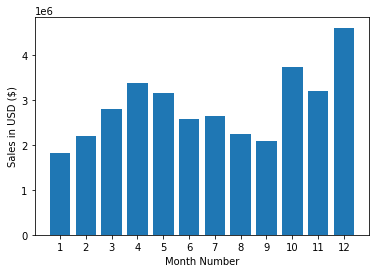

In [49]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

In [ ]:
#which city has the highest number of sales

In [59]:
#adding a city coulumn
city_data = data.copy()

In [61]:
city_data['Cities'] = city_data['Purchase Address'].apply(lambda x: x.split(',')[1])
city_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [64]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

city_data['city'] = city_data['Purchase Address'].apply(lambda x: get_city(x)+' '+get_state(x))

city_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,city
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston MA
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA


In [66]:
result2 = city_data.groupby('Cities').sum()
result2

,Quantity Ordered,Price Each,Month,Sales
Cities,,,,
Atlanta,16602,2779908.20,104794,2795498.58
Austin,11153,1809873.61,69829,1819581.75
Boston,22528,3637409.77,141112,3661642.01
Dallas,16730,2752627.82,104620,2767975.40
Los Angeles,33289,5421435.23,208325,5452570.80
New York City,27932,4635370.83,175741,4664317.43
Portland,14053,2307747.47,87765,2320490.61
San Francisco,50239,8211461.74,315520,8262203.91
Seattle,16553,2733296.01,104941,2747755.48


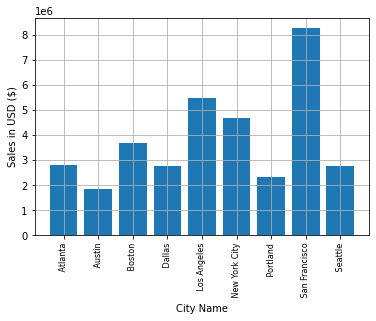

In [105]:
cities = [city for city, df in city_data.groupby('Cities')]

plt.bar(cities, result2['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.grid()
plt.show()

In [ ]:
# best time for advertising to 
# the customers for maximum likelyhood of purchase

In [71]:
city_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,city
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston MA
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA


In [72]:
time_data = city_data.copy()

In [74]:
time_data['Time'] = time_data['Order Date'].apply(lambda x : x.split(' ')[1])
time_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,city,Time
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas TX,8:46
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston MA,22:30
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA,14:38
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA,14:38
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA,9:27


In [77]:
time_data['Time'] = pd.to_datetime(time_data['Time'])
time_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,city,Time
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas TX,2022-09-10 08:46:00
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston MA,2022-09-10 22:30:00
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA,2022-09-10 14:38:00
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA,2022-09-10 14:38:00
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA,2022-09-10 09:27:00


In [93]:
time_data['Hour'] = time_data['Time'].dt.hour
time_data['Minute'] = time_data['Time'].dt.minute
time_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,city,Time,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas TX,2022-09-10 08:46:00,8,46
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston MA,2022-09-10 22:30:00,22,30
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA,2022-09-10 14:38:00,14,38
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA,2022-09-10 14:38:00,14,38
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA,2022-09-10 09:27:00,9,27


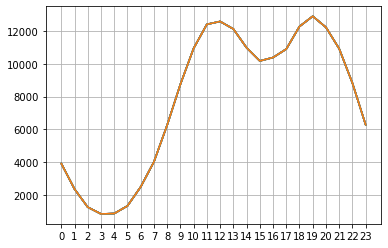

In [104]:
hours = [hour for hour, df in time_data.groupby('Hour')]

temp = time_data.groupby(['Hour']).count()

plt.plot(hours, temp.iloc[:,:].values)
plt.xticks(hours)
plt.grid()
plt.show()

In [ ]:
#which products are often sold together

In [124]:
order_data = city_data.copy()

In [110]:
repeated = order_data[order_data['Order ID'].duplicated(keep=False)]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,city
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA
17,176574,Google Phone,1,600.00,4/3/2019 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA
18,176574,USB-C Charging Cable,1,11.95,4/3/2019 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,Los Angeles CA
29,176585,Bose SoundSport Headphones,1,99.99,4/7/2019 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,Boston MA
30,176585,Bose SoundSport Headphones,1,99.99,4/7/2019 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,Boston MA
31,176586,AAA Batteries (4-pack),2,2.99,4/10/2019 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,San Francisco CA
32,176586,Google Phone,1,600.00,4/10/2019 17:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco,San Francisco CA
118,176672,Lightning Charging Cable,1,14.95,4/12/2019 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,New York City NY
119,176672,USB-C Charging Cable,1,11.95,4/12/2019 11:07,"778 Maple St, New York City, NY 10001",4,11.95,New York City,New York City NY


In [112]:
repeated['Items Together'] = repeated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\gunee\AppData\Local\Temp\ipykernel_10980\1332825324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeated['Items Together'] = repeated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [113]:
repeated.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,city,Items Together
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,4/3/2019 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,4/3/2019 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,Los Angeles CA,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,4/7/2019 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,Boston MA,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [116]:
repeated = repeated[['Order ID','Items Together']].drop_duplicates()
repeated.head()

,Order ID,Items Together
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [118]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in repeated['Items Together']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [126]:
# finding out the most sold product

product_grp = order_data.groupby('Product')
quantity_ordered = product_grp.sum()['Quantity Ordered']

products = [product for product, df in product_grp]

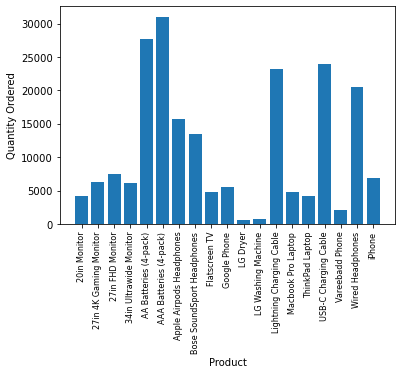

In [128]:
plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation="vertical", size=8)
plt.show()

In [131]:
prices = order_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\gunee\AppData\Local\Temp\ipykernel_10980\3688053874.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size = 8)


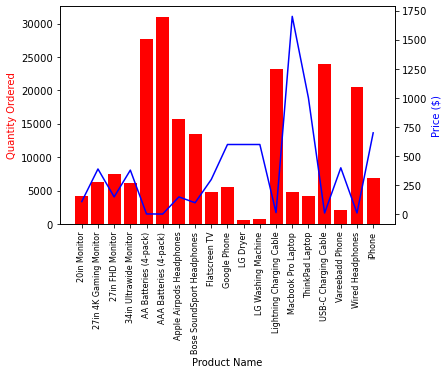

In [135]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='r')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='r')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size = 8)

plt.show()